In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('guitars.csv')

df

,brand,model,type,strings,frets,price,mensuration,body,colour,descr,img
0,Homage,HEG350BK,Stratocaster,6,22,14.110,25.500,массив твёрдого дерева,черный,C:/Users/user/ct/da/lab1-parser/descrs/1.html,C:/Users/user/ct/da/lab1-parser/imgs/1.jpg
1,ROCKET,ST-02 BB,Stratocaster,6,22,9.990,25.500,ольха,чёрный,C:/Users/user/ct/da/lab1-parser/descrs/2.html,C:/Users/user/ct/da/lab1-parser/imgs/2.jpg
2,ROCKET,EG-1 BK,Ibanez,6,22,11.990,25.500,ольха,чёрный,C:/Users/user/ct/da/lab1-parser/descrs/3.html,C:/Users/user/ct/da/lab1-parser/imgs/3.jpg
3,ROCKET,ST-32 SB,Stratocaster,6,22,7.990,25.500,липа,санбёрст,C:/Users/user/ct/da/lab1-parser/descrs/4.html,C:/Users/user/ct/da/lab1-parser/imgs/4.jpg
4,ROCKET,ST-01 SB,Stratocaster,6,22,9.490,25.500,ольха,чёрный,C:/Users/user/ct/da/lab1-parser/descrs/5.html,C:/Users/user/ct/da/lab1-parser/imgs/5.jpg
...,...,...,...,...,...,...,...,...,...,...,...
597,Fender,SQUIER CLASSIC VIBE STRAT 60`s 3-COLOR SUNBURST,Stratocaster,6,21,49.822,25.512,ольха,темное золото,C:/Users/user/ct/da/lab1-parser/descrs/598.html,C:/Users/user/ct/da/lab1-parser/imgs/598.jpg
598,Burny,RSG60`63 CR,SG,6,22,59.990,24.700,махагони,красный,C:/Users/user/ct/da/lab1-parser/descrs/599.html,C:/Users/user/ct/da/lab1-parser/imgs/599.jpg
599,Schecter,DAMIEN-6 SBK,Stratocaster,6,24,54.182,25.500,красное дерево,чёрный,C:/Users/user/ct/da/lab1-parser/descrs/600.html,C:/Users/user/ct/da/lab1-parser/imgs/600.jpg
600,Aria,PE-350PF AGBK,Les Paul,6,22,23.500,25.500,окоуме,agbk aged black,C:/Users/user/ct/da/lab1-parser/descrs/601.html,C:/Users/user/ct/da/lab1-parser/imgs/601.jpg


In [3]:
img1 = pd.DataFrame()
img1[['price', 'img']] = df[['price', 'img']]

img1

,price,img
0,14.110,C:/Users/user/ct/da/lab1-parser/imgs/1.jpg
1,9.990,C:/Users/user/ct/da/lab1-parser/imgs/2.jpg
2,11.990,C:/Users/user/ct/da/lab1-parser/imgs/3.jpg
3,7.990,C:/Users/user/ct/da/lab1-parser/imgs/4.jpg
4,9.490,C:/Users/user/ct/da/lab1-parser/imgs/5.jpg
...,...,...
597,49.822,C:/Users/user/ct/da/lab1-parser/imgs/598.jpg
598,59.990,C:/Users/user/ct/da/lab1-parser/imgs/599.jpg
599,54.182,C:/Users/user/ct/da/lab1-parser/imgs/600.jpg
600,23.500,C:/Users/user/ct/da/lab1-parser/imgs/601.jpg


In [4]:
def opn(path):
    with Image.open(f"{path}") as i:
        return i.resize((300, 300)).convert("RGB")

img2 = pd.DataFrame()
img2['price'] = img1['price']
img2['img'] = img1['img'].apply(lambda x: opn(x))

In [5]:
img2

,price,img
0,14.110,<PIL.Image.Image image mode=RGB size=300x300 a...
1,9.990,<PIL.Image.Image image mode=RGB size=300x300 a...
2,11.990,<PIL.Image.Image image mode=RGB size=300x300 a...
3,7.990,<PIL.Image.Image image mode=RGB size=300x300 a...
4,9.490,<PIL.Image.Image image mode=RGB size=300x300 a...
...,...,...
597,49.822,<PIL.Image.Image image mode=RGB size=300x300 a...
598,59.990,<PIL.Image.Image image mode=RGB size=300x300 a...
599,54.182,<PIL.Image.Image image mode=RGB size=300x300 a...
600,23.500,<PIL.Image.Image image mode=RGB size=300x300 a...


In [22]:
target = pd.DataFrame()
target['price'] = img1['price']
x = img1.drop(columns=['price'])

train, test, train_price, test_price = train_test_split(x, target, test_size=0.2, random_state=8)
train, val, train_price, val_price = train_test_split(train, train_price, test_size=0.2/(1-0.2), random_state=8)

img2.to_csv("img.csv")

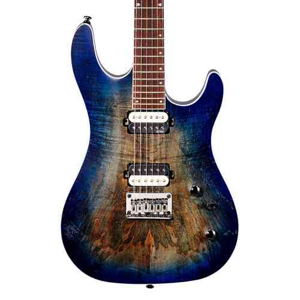

In [21]:
opn("C:/Users/user/ct/da/lab1-parser/imgs/25.jpg")

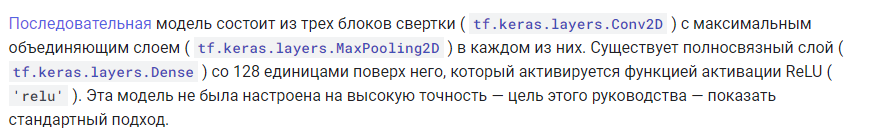

In [7]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(300, 300, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mean_absolute_percentage_error'])

In [18]:
train2 = np.array(list(map(lambda path: tf.convert_to_tensor(opn(path)), train['img'])))

val2 = np.array(list(map(lambda path: tf.convert_to_tensor(opn(path)), val['img'])))

test2 = np.array(list(map(lambda path: tf.convert_to_tensor(opn(path)), test['img'])))

In [19]:
model.fit(train2, train_price, validation_data=(val2, val_price), epochs=5)

Epoch 1/5


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12/12 [==============================] - 44s 4s/step - loss: 7131.7856 - mse: 7131.7856 - mean_absolute_percentage_error: 117.9300 - val_loss: 7950.0039 - val_mse: 7950.0039 - val_mean_absolute_percentage_error: 89.5051
Epoch 2/5
12/12 [==============================] - 45s 4s/step - loss: 6624.6318 - mse: 6624.6318 - mean_absolute_percentage_error: 123.4815 - val_loss: 7552.3086 - val_mse: 7552.3086 - val_mean_absolute_percentage_error: 147.3939
Epoch 3/5
12/12 [==============================] - 49s 4s/step - loss: 7048.6777 - mse: 7048.6777 - mean_absolute_percentage_error: 131.2713 - val_loss: 7593.7271 - val_mse: 7593.7271 - val_mean_absolute_percentage_error: 93.5837
Epoch 4/5
12/12 [==============================] - 41s 3s/step - loss: 6301.0933 - mse: 6301.0933 - mean_absolute_percentage_error: 115.7594 - val_loss: 7319.4146 - val_mse: 7319.4146 - val_mean_absolute_percentage_error: 99.7637
Epoch 5/5
12/12 [==============================] - 38s 3s/step - loss: 5752.0835 - mse: 5

In [18]:
y_test = model.predict(test2)

4/4 [==============================] - 4s 864ms/step


In [19]:
print(mean_squared_error(y_test, test_price))

8530.679663051233
